In [3]:
import pandas as pd, numpy as np
import seaborn as sns, matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
from scipy import stats

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
arabica = pd.read_csv('../data/raw/arabica_data_cleaned.csv')
arabica

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,12,1 kg,AMECAFE,2012,"September 17th, 2012",JUAN CARLOS GARCIA LOPEZ,Bourbon,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,0.11,0,0.0,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,1,2 kg,Specialty Coffee Association,2012,"May 24th, 2012",Myriam Kaplan-Pasternak,Typica,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,0.14,8,0.0,Blue-Green,16,"May 24th, 2013",

## Reducción de Variables

In [6]:
arabica = arabica[['Country.of.Origin', 'Variety','Processing.Method', 'Moisture', 'Harvest.Year',
                   'Color', 'unit_of_measurement', 'altitude_mean_meters', 'Category.One.Defects', 'Category.Two.Defects',
                   'Total.Cup.Points']]

## Procesado de Variables

### Tratado de Datos Nulos

Puesto que la gran mayoría de datos nulos se encuentran dentro de los mismos registros, considero que la mejor opción sería eliminarlos todos.

In [7]:
arabica = arabica.dropna()

### Otras conversiones

#### País de Origen

In [8]:
otros = arabica['Country.of.Origin'].value_counts() <= 5
for i in range(len(otros.index)):
    if(otros[i]):
        arabica.loc[arabica["Country.of.Origin"] == otros.index[i], "Country.of.Origin"] = "Other"

#### Variedad

In [9]:
otros = arabica['Variety'].value_counts() == 1
for i in range(len(otros.index)):
    if(otros[i]):
        arabica.loc[arabica["Variety"] == otros.index[i], "Variety"] = "Other"

#### Año de Cosecha

In [10]:
year = {'2015/2016' : 2016,
        '2013/2014' : 2014,
        '2017 / 2018' : 2018,
        '2014/2015' : 2015,
        '2011/2012' : 2012,
        '2016 / 2017' : 2017}

arabica['Harvest.Year'] = arabica['Harvest.Year'].replace(year).astype(int)

#### Color

In [11]:
color = {'Green': 'None',
         'Blue' : ['Blue-Green', 'Bluish-Green']}
arabica['Color'] = arabica['Color'].map(lambda x: next((k for k, v in color.items() if x in v), x))

#### Altitud

In [12]:
mask = arabica['unit_of_measurement'].eq('ft')
arabica.loc[mask, ['altitude_mean_meters']] /= 3.281
arabica= arabica.drop(columns= "unit_of_measurement")

In [13]:
pd.read_csv('../data/raw/arabica_data_cleaned.csv')

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,Region,Producer,Number.of.Bags,Bag.Weight,In.Country.Partner,Harvest.Year,Grading.Date,Owner.1,Variety,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,NaN,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,0.12,0,0.0,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
1,2,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,0.12,0,0.0,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
2,3,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,NaN,NaN,5,1,Specialty Coffee Association,NaN,"May 31st, 2010",Grounds for Health Admin,Bourbon,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.00,0,0.0,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.00,1800.00,1700.00
3,4,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,oromia,Yidnekachew Dabessa Coffee Plantation,320,60 kg,METAD Agricultural Development plc,2014,"March 26th, 2015",Yidnekachew Dabessa,NaN,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,0.11,0,0.0,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.00,2200.00,2000.00
4,5,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,guji-hambela,METAD PLC,300,60 kg,METAD Agricultural Development plc,2014,"April 4th, 2015",metad plc,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,0.12,0,0.0,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.00,2200.00,2075.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1306,1307,Arabica,juan carlos garcia lopez,Mexico,el centenario,NaN,"la esperanza, municipio juchique de ferrer, ve...",1104328663,terra mia,900,juchique de ferrer,JUAN CARLOS GARCÍA LOPEZ,12,1 kg,AMECAFE,2012,"September 17th, 2012",JUAN CARLOS GARCIA LOPEZ,Bourbon,Washed / Wet,7.08,6.83,6.25,7.42,7.25,6.75,10.00,0.00,10.00,6.75,68.33,0.11,0,0.0,None,20,"September 17th, 2013",AMECAFE,59e396ad6e22a1c22b248f958e1da2bd8af85272,0eb4ee5b3f47b20b049548a2fd1e7d4a2b70d0a7,m,900.00,900.00,900.00
1307,1308,Arabica,myriam kaplan-pasternak,Haiti,200 farms,NaN,coeb koperativ ekselsyo basen (350 members),NaN,haiti coffee,~350m,"department d'artibonite , haiti",COEB Koperativ Ekselsyo Basen,1,2 kg,Specialty Coffee Association,2012,"May 24th, 2012",Myriam Kaplan-Pasternak,Typica,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,0.14,8,0.0,Blue-Green,16,"May 24th, 2013",

In [14]:
# Outliers

# (Dato curioso: el Monte Everest mide 8,849 m)

arabica= arabica[~(arabica["altitude_mean_meters"] > 9000)]

# Procesado

### Encoding

In [15]:
lb = LabelBinarizer()

arabica.Color = lb.fit_transform(arabica.Color)

In [16]:
le = LabelEncoder()

columnas = ["Country.of.Origin", "Variety", "Processing.Method"]

for columna in columnas:
    arabica[columna] = le.fit_transform(arabica[columna])

In [17]:
# Esto es una alternativa al labelencoding
# arabicadum = pd.get_dummies(arabica)

# Target

In [18]:
calidad = ['Estándar', 'Bueno', 'Premium']
calif = [0, 80, 85, 100]
arabica['Calidad'] = pd.cut(arabica['Total.Cup.Points'], bins=calif, labels=calidad)

In [19]:
arabica.Calidad.value_counts(normalize=True)

Bueno       0.815642
Estándar    0.136313
Premium     0.048045
Name: Calidad, dtype: float64

# Balanceo

In [20]:
from imblearn.over_sampling import RandomOverSampler

In [21]:
ros = RandomOverSampler(random_state=5)
X_resampled, y_resampled = ros.fit_resample(arabica.loc[:, 'Country.of.Origin':'Total.Cup.Points'], arabica['Calidad'])

In [22]:
df_resampled = pd.DataFrame(X_resampled, columns=arabica.loc[:, 'Country.of.Origin':'Total.Cup.Points'].columns)
df_resampled['Calidad'] = y_resampled

In [23]:
df_balanced = pd.concat([arabica, df_resampled], ignore_index=True)
df_balanced

,Country.of.Origin,Variety,Processing.Method,Moisture,Harvest.Year,Color,altitude_mean_meters,Category.One.Defects,Category.Two.Defects,Total.Cup.Points,Calidad
0,5,7,4,0.12,2014,1,2075.0,0,1,89.92,Premium
1,5,7,4,0.12,2014,1,2075.0,0,2,88.83,Premium
2,5,7,0,0.10,2014,1,1822.5,0,4,88.25,Premium
3,1,1,4,0.10,2015,1,1450.0,0,0,87.25,Premium
4,14,7,4,0.00,2014,1,2019.0,0,0,87.25,Premium
...,...,...,...,...,...,...,...,...,...,...,...
3080,18,11,4,0.12,2013,1,1950.0,0,1,86.83,Premium
3081,9,13,4,0.00,2012,1,1200.0,0,6,85.33,Premium
3082,11,7,4,0.13,2012,1,1320.0,0,0,87.17,Premium
3083,18,11,4,0.12,2013,1,1600.0,0,1,85.50,Premium


In [82]:
X = df_balanced.drop(columns='Calidad')
y = df_balanced['Calidad']

In [83]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)

In [85]:
pipe = Pipeline(steps=[("scaler", StandardScaler()),
                       ("selectkbest", SelectKBest()),
                       ("pca", PCA()),
                       ('classifier', RandomForestClassifier())])

logistic_params = {'selectkbest__k' : [1,2],
                   'pca__n_components': [1,2],
                   'classifier': [LogisticRegression(solver='liblinear')],
                   'classifier__penalty': ['l1','l2']}

rf_params = {'scaler' : [StandardScaler(), None],
             'selectkbest__k' : [1,2],
             'pca__n_components': [1,2],
             'classifier': [RandomForestClassifier()],
             'classifier__max_features': [2,3,4],
             'classifier__max_depth': [3,5,7]}

gb_params = {'scaler' : [StandardScaler(), None],
             'selectkbest__k' : [1,2],
             'pca__n_components': [1,2],
             'classifier': [GradientBoostingClassifier()],
             'classifier__max_features': [2,3,4],
             'classifier__max_depth': [3,5,7]}

knn_params = {'selectkbest__k' : [1,2],
              'pca__n_components': [1,2],
              'classifier': [KNeighborsClassifier()],
              'classifier__n_neighbors': [1,2,3]}

svm_params = {'selectkbest__k' : [1,2],
              'pca__n_components': [1,2],
              'classifier': [SVC()],
              'classifier__C': [20, 40, 60]}

In [86]:
search_space = [logistic_params, rf_params, gb_params, knn_params, svm_params]

clf = GridSearchCV(estimator = pipe, param_grid = search_space, cv=3, scoring="accuracy", n_jobs=-1)

In [87]:
clf.fit(X_train, y_train)

c:\Users\ciruz\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
420 fits failed out of a total of 528.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
132 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\ciruz\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\ciruz\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\ciruz\AppData\Local\Programs\Python\Python37\lib\site-packages\sklea

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('selectkbest', SelectKBest()),
                                       ('pca', PCA()),
                                       ('classifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(solver='liblinear')],
                          'classifier__penalty': ['l1', 'l2'],
                          'pca__n_components': [1, 2],
                          'selectkbest__k': [1, 2]},
                         {'classifier': [RandomForestClas...
                          'classifier__max_features': [2, 3, 4],
                          'pca__n_components': [1, 2],
                          'scaler': [StandardScaler(), None],
                          'selectkbest__k': [1, 2]},
                         {'classifier': [KNeighborsClassifier(n_neighbors=1)],
           

In [88]:
clf.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()), ('selectkbest', SelectKBest(k=1)),
                ('pca', PCA(n_components=1)),
                ('classifier', KNeighborsClassifier(n_neighbors=1))])

In [89]:
clf.best_params_

{'classifier': KNeighborsClassifier(n_neighbors=1),
 'classifier__n_neighbors': 1,
 'pca__n_components': 1,
 'selectkbest__k': 1}

In [90]:
y_pred = clf.best_estimator_.predict(X_test)

In [100]:
from sklearn import metrics

metrics.accuracy_score(y_test, y_pred)


1.0

In [101]:
metrics.confusion_matrix(y_test, y_pred)

array([[298,   0,   0],
       [  0, 155,   0],
       [  0,   0, 164]], dtype=int64)

<AxesSubplot:>

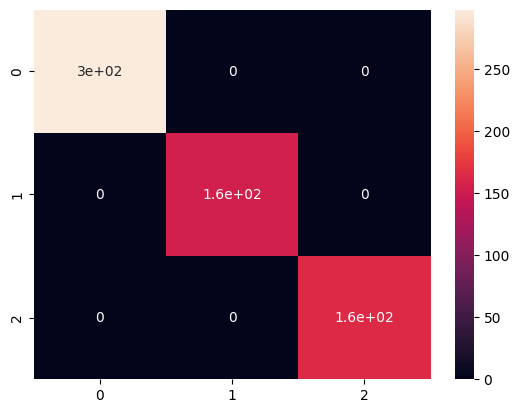

In [98]:
sns.heatmap(metrics.confusion_matrix(y_test, y_pred), annot=True)

In [93]:
arabicatest = pd.read_csv('../data/test/arabica_test2.csv')

testX = arabicatest.drop(columns= ['Calidad'])
testy = arabicatest['Calidad']

In [ ]:
metrics.accuracy_score(y_test, y_pred)